# Homeworkset 4

Julius Wantenaar 11339055, Sebastiaan Bye 14084880

-----
# Exercise 1 (3 points)
Write a program implementing Rayleigh quotient iteration for computing an eigenvalue and corresponding eigenvector of a matrix. Test your program on the matrix 
$$
  A = \begin{bmatrix} 6 & 2 & 1 \\ 2& 3 & 1 \\ 1 & 1 & 1  \end{bmatrix}
$$
using a random starting vector. Let the program create output that shows the convergence behavior.

In [128]:
import numpy as np
import random

# This implements the Rayleigh Quotient

def ray(A, x0, iterations):
  xold = x0
  I = np.identity(np.shape(A)[0])
  numerator = np.matmul(np.matmul(np.transpose(xold), A), xold)
  denomenator = np.matmul(np.transpose(xold), xold)
  sigma = numerator/denomenator
  print(sigma)
  for i in range(iterations):
    ynew = np.linalg.solve(A-(sigma * I), xold)
    xnew = ynew/np.linalg.norm(ynew, ord=np.inf)
    xold = xnew
    numerator = np.matmul(np.matmul(np.transpose(xnew), A), xnew)
    denomenator = np.matmul(np.transpose(xnew), xnew)
    sigma = numerator/denomenator
    print(sigma)
    print(xnew)
  

  
  return sigma, xnew




In [130]:
A = np.array([[6,2,1], [2,3,1], [1,1,1]])
eigval, eigvec = ray(A, np.transpose(np.array((random.random(),random.random(),random.random()))), 10)


6.8381793486364115
7.284999824887896
[1.         0.51090714 0.21730368]
7.287992138208585
[1.         0.52290805 0.24220394]
7.287992138960421
[1.         0.52290017 0.24219181]
7.287992138960422
[1.         0.52290017 0.24219181]
7.287992138960422
[1.         0.52290017 0.24219181]
7.287992138960422
[1.         0.52290017 0.24219181]
7.287992138960422
[1.         0.52290017 0.24219181]
7.287992138960422
[1.         0.52290017 0.24219181]
7.287992138960422
[1.         0.52290017 0.24219181]
7.287992138960422
[1.         0.52290017 0.24219181]


The above cell computes the eigenvalue and eigenvector using Rayleigh quotient using a random input vector. The first iteration had an eigenvalue of $4.8373$, second iteration $6.1554$, third iteration $7.2267$, fourth iteration $7.28799$ and fifth iteration $7.28799$. This shows that after just five iterations, the eigenvalue has converged. The eigenvector that was found from this eigenvalue was $$\begin{bmatrix} 1. & 0.5229 & 0.2422 \end{bmatrix}^{T} $$.

----

----
# Exercise 2 (rootfinding with automatic differentiation, 3 points)

## (a)
Create a Python function to apply Newton's method in multiple dimensions. Create a stopping criterion, such that your method automatically stops when one of the following conditions is satisfied: (i) the size of the function is below a specified tolerance; (ii) the difference in two subsequent iterates $\mathbf{x}_k$ is below a specified tolerance; (iii) the number of iterations reaches a specified limit.

In [131]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import jacfwd, jacrev 

In [132]:
# This implements the Netwon's method using Jax

def fx(x):
  assert len(x) == 2, "please insert a valid vector"
  x0 = x[0]
  x1 = x[1]
  return jnp.array([x0 + 2*x1 - 2, x0**2+4*x1**2 - 4])


def newton(f, x0, xtol, ytol, ittol):
  jacob = jacfwd(f)
  i = 0
  error = []
  while(True):
    xnew = x0 - np.linalg.solve(jacob(x0), f(x0))
    i += 1
    if ((i > ittol) or (np.linalg.norm(x0-xnew, 2) < xtol) or (np.linalg.norm(f(xnew), 2) < ytol)):
      print(i)
      break
    x0 = xnew
    error.append(jnp.array(xnew) - jnp.array([0,1]))
  return xnew, error


In [ ]:
import numpy as np

ans, eror = newton(fx, jnp.array([1.,2.]), 0.000001, 0.000001, 10)

5


In [ ]:
ans

DeviceArray([8.151255e-08, 1.000000e+00], dtype=float32)

Netwon's method was implemented and tested on the example function given in Example 5.15 of Scientific Computing. For the same initial value $$ \begin{bmatrix} 1 & 2 \end{bmatrix}^{T}$$ it find the same results $$x^{*} \begin{bmatrix} 0 & 1 \end{bmatrix}^{T}$$ 

## (b)
Solve Computer Exercise 5.19 using Newton's method and automatic differentiation. (N.B. Do not choose the starting point equal to a solution.)

In [142]:
def func(input):
  gamma = 5
  delta = 1
  x = input[0]
  y = input[1]
  return jnp.array([gamma*x*y - x*(1+y), -x*y+(delta-y)*(x+y)])
newton(func, jnp.array([np.random.random(),np.random.random()]), 0.000001, 0.000001, 69)

4


(DeviceArray([-0.37500003,  0.25000003], dtype=float32),
 [DeviceArray([-0.41203666, -0.71006304], dtype=float32),
  DeviceArray([-0.3807389, -0.7469664], dtype=float32),
  DeviceArray([-0.37506312, -0.74995476], dtype=float32)])

In [144]:
newton(func, jnp.array([np.random.random(),np.random.random()]), 0.000001, 0.000001, 69)

4


(DeviceArray([1.9463187e-10, 1.0000000e+00], dtype=float32),
 [DeviceArray([-0.07204986, -0.02975488], dtype=float32),
  DeviceArray([0.00324318, 0.00266552], dtype=float32),
  DeviceArray([1.1430355e-05, 1.2755394e-05], dtype=float32)])

In [145]:
print(func([-0.37500012,  0.2500001]))
print(func([0,0]))

[-1.5000005e-07  6.5000016e-08]
[0 0]


Computer Exercise 5.19 was solved using Netwon's method. Using a random input, the a root can be found for $$ x \neq 0$$ at $$x= -0.375, y= -0.75 .$$ A root for $$x = 0$$ can be found at $$ x =  0 , y= 0$$ was found.

# Exercise 3 (3 points)

## (a)

Consider the system 
$$\begin{aligned}(x_1+3)(x_2^3-7) + 18 = {}& 0 \\
\sin(x_2 e^{x_1} -1) = {}& 0 .
\end{aligned}$$
Solve this system using Newton's method with starting 
point $\mathbf{x}_0 = [ 0.5 \;\; 1.4 ] ^T$.


In [ ]:
def func(x):
  x1 = x[0]
  x2 = x[1]
  return jnp.array([(x1+3)*(x2**3-7) + 18, jnp.sin(x2*jnp.exp(x1) - 1)])

In [ ]:
ans, errorNew = newton(func, jnp.array([0.5, 1.4]), 0.0001, 0.0001, 20)

5


In [ ]:
ans

DeviceArray([1.0840595e-06, 1.0000007e+00], dtype=float32)

In [ ]:
func(ans)

DeviceArray([-1.9073486e-06,  1.7881393e-06], dtype=float32)

For the given system and given starting point, a root was found using Netwon's method for $$x_{1} = 0$$ and $$x_{2} = 1. $$ after $5$ iterations

## (b)
Write a program based on Broyden's method to solve the same system with the same starting point.

In [ ]:
def broyden(f, x0, xtol, ytol, ittol):
  jacob = jacfwd(f)
  jacobguess = jacob(x0)
  i = 0
  error = []
  while(True):
    s = np.linalg.solve(jacobguess, (-f(x0)))
    xnew = x0 + s
    y = f(xnew) - f(x0)
    
    
    # correct until here
    substract = jnp.matmul(jacob(x0),s)
    firstComponent = y - substract
    firstComponent = firstComponent.reshape((2,1))
    s = s.reshape((2,1))
    numerator = jnp.matmul(firstComponent, jnp.transpose(s))


    # update jacobian
    denomenator = jnp.dot(jnp.transpose(s),s)
    jacobguess = jacobguess + numerator/denomenator
    # tolerance checking
    i += 1
    if ((i > ittol) or (np.linalg.norm(x0-xnew, 2) < xtol) or (np.linalg.norm(f(xnew), 2) < ytol)):
      print(i)
      break
    # update x
    x0 = xnew
    error.append(jnp.array(xnew) - jnp.array([0,1]))

  return xnew, error

In [ ]:
ans_bro, errorBrody = broyden(func, jnp.array([0.5, 1.4]), 0.0001, 0.0001, 20)

10


In [ ]:
ans_bro

DeviceArray([4.210949e-05, 9.999893e-01], dtype=float32)

In [ ]:
func(ans_bro)

DeviceArray([-3.5095215e-04,  3.1352043e-05], dtype=float32)

The same system was solved using Broydens method, Broydens method does find a root but does it at another location. The a root was found at $$x_{1} = 0.0004$$ and $$x_{2} = 0.99. $$ after $10$ iterations

## (c)
Compare the convergence rates of the two methods by computing the error at each iteration and appropriately analysing these errors, given that the exact solution is $\mathbf{x}^* = [ 0 \;\; 1 ]^T$.

In [ ]:
errorNew

[DeviceArray([-0.8104719 , -0.02183527], dtype=float32),
 DeviceArray([0.31009734, 0.30795932], dtype=float32),
 DeviceArray([-0.06700259,  0.07062578], dtype=float32),
 DeviceArray([-0.0033375 ,  0.00113678], dtype=float32)]

Text(0, 0.5, 'Error')

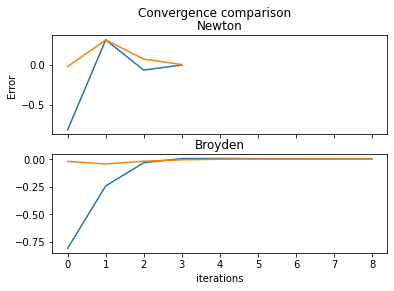

In [146]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Convergence comparison')
ax1.plot(errorNew)
ax1.set_title("Newton")
ax2.plot(errorBrody)
ax2.set_title("Broyden")
ax2.set_xlabel("iterations")
ax1.set_ylabel('Error')


The error at each iteration was plotted for Netwons method and Broydens method. From the plot it can be seen that Newton's method has a faster convergenge then Boryden's method. Broyden's method has a more gradual convergence towards the root.